#  CNN개념이해_MNIST

* 본 파일은 GPU 런타임으로 연결됩니다.
* 경우에 따라서는 GPU 연결이 원할하지 않을 수도 있습니다.

## 1.환경준비

### (1) 라이브러리 로딩

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import cv2, os

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = ',')
    plt.plot(history['val_loss'], label='val_err', marker = ',')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [3]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

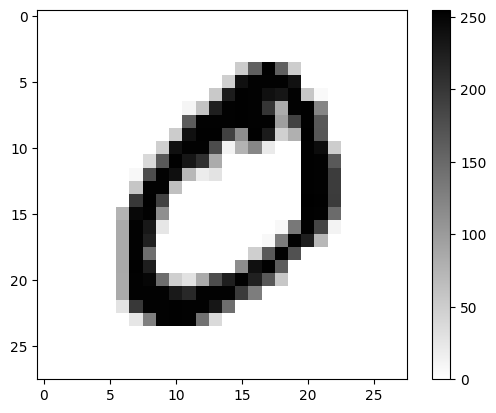

In [6]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 1

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

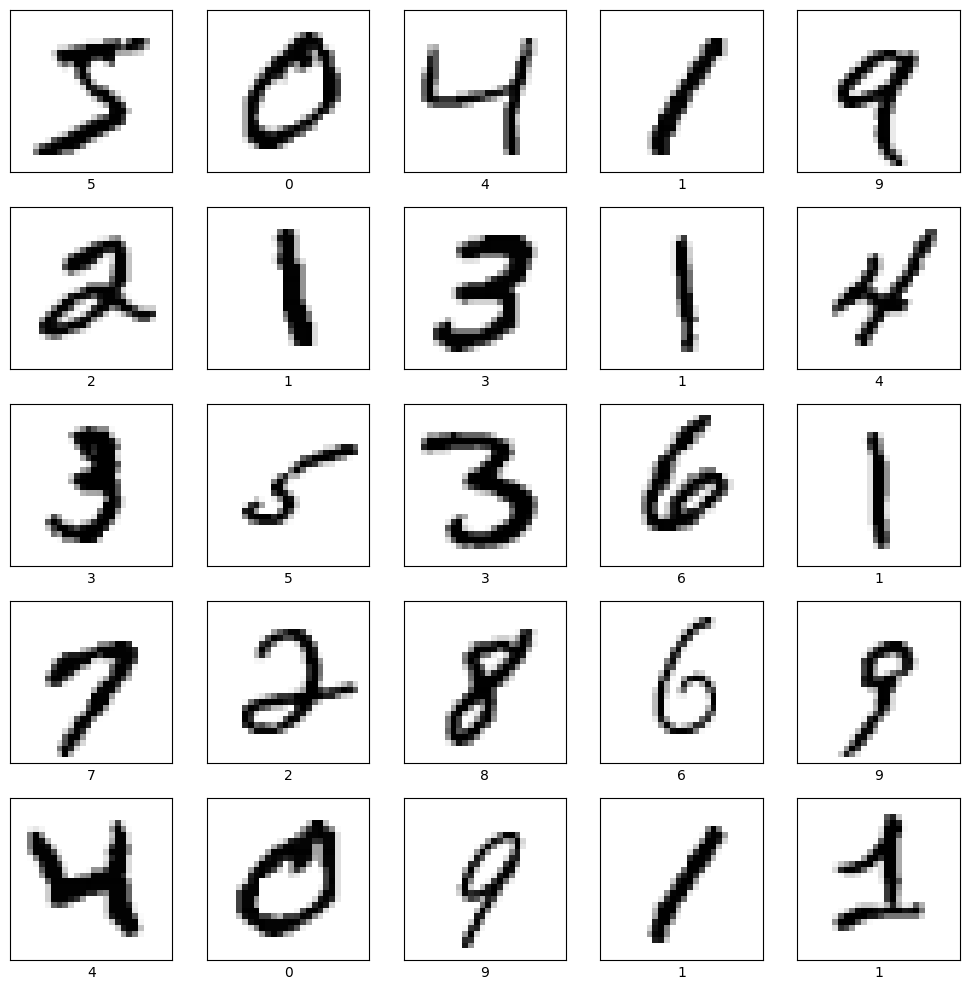

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

* CNN은 3차원 구조의 이미지(데이터셋은 4차원)를 입력해야 합니다.(input_shape)

In [6]:
x_train.shape, x_val.shape

((60000, 28, 28), (10000, 28, 28))

* reshape를 이용하여 다음과 같이 변환해 봅시다.
    * x_train.shape : (60000, 28, 28, 1)
    * x_val.shape : (10000, 28, 28, 1)

In [7]:
x_train = x_train.reshape(60000,28,28,1)
x_val = x_val.reshape(10000,28,28,1)

* Scaling : Min-Max
    * 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
    * x_train, x_test를 그냥 255로 나누면 됨

In [8]:
x_train = x_train / 255.
x_test = x_val / 255.

## 5.CNN 기본 모델링

### (1) 모델 설계
* CNN 모델의 기본 구조
    * Conv2D  : 지역적인 특징 도출
    * MaxPooling : 요약
    * Flatten : 1차원으로 펼치기
    * Dense : Output Layer

In [11]:
clear_session()

model = Sequential([Conv2D(16, kernel_size=(3, 3), input_shape=(28, 28, 1), padding='same', strides = 1, activation='relu'),
                    MaxPooling2D(pool_size=(2, 2), strides=2),
                    Flatten(),
                    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 10)                31370     
                                                                 
Total params: 31530 (123.16 KB)
Trainable params: 31530 (123.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) 학습

In [12]:
history = model.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 16s 4ms/step - loss: 0.2865 - val_loss: 0.1347
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1102 - val_loss: 0.0952
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0804 - val_loss: 0.0857
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0656 - val_loss: 0.0699
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0566 - val_loss: 0.0776
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0492 - val_loss: 0.0697
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0429 - val_loss: 0.0706
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0387 - val_loss: 0.0707
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0352 - val_loss: 0.0680
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.

### (3) 학습결과 그래프

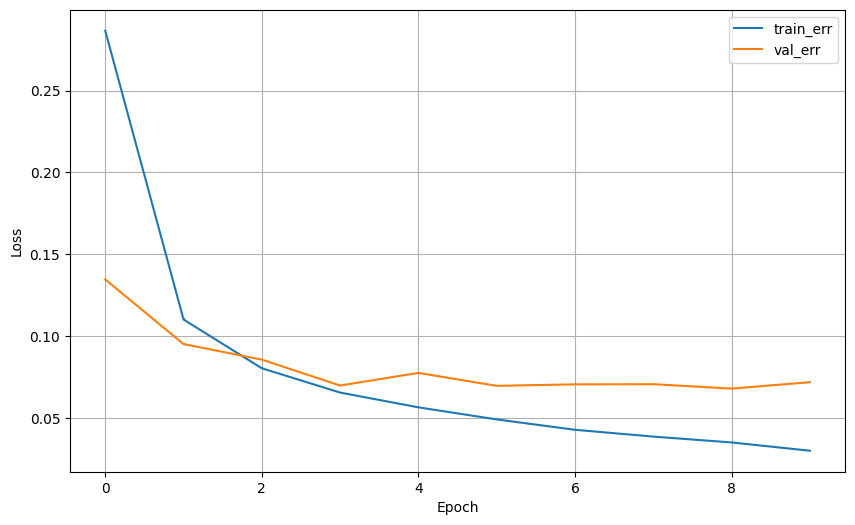

In [13]:
dl_history_plot(history)

### (4) 예측 및 평가

In [14]:
pred = model.predict(x_val)

313/313 [==============================] - 1s 2ms/step


In [15]:
pred_1 = pred.argmax(axis=1)

In [16]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.6029
------------------------------------------------------------
[[ 894    0    0    0    0    0    1    0   84    1]
 [   0    0    1    1    0    0    4    0 1129    0]
 [   2    0  614    0    0    0    3    0  411    2]
 [   0    0    1  755    0    0    0    0  252    2]
 [   1    0    2    0  759    0    3    0  207   10]
 [   4    0    0   18    0   47    3    0  803   17]
 [   7    0    0    0    1    0  880    0   70    0]
 [   0    0    4    9    2    0    0  393  439  181]
 [   1    0    0    0    0    0    0    0  973    0]
 [   0    0    0    0    0    0    0    0  295  714]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       980
           1       0.00      0.00      0.00      1135
           2       0.99      0.59      0.74      1032
           3       0.96      0.75      0.84      1010
           4       1.00      0.77      0.87       982
           5   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 6.실습


### (1) 모델1
* 기본 모델링에서 다음을 조정해 봅시다.
    * Flatten 이후 Dense 레이어 추가(노드수 128)

| Layer (type) | Output Shape  | Param #   |
|---- |----|----|
| conv2d (Conv2D)  |  (None, 28, 28, 16) | 160       |
| max_pooling2d |  (None, 14, 14, 16) |      0         |
| flatten (Flatten) | (None, 3136)   |           0         |
| **dense (Dense)** |    **(None, 128)**   |            401536    |
| dense_1 (Dense) |    (None, 10)   |             1290     |

In [18]:
clear_session()

model = Sequential([Conv2D( 16, kernel_size=(3, 3), input_shape=(28, 28, 1), padding='same', strides = 1, activation='relu'),
                    MaxPooling2D(pool_size=(2, 2), strides=2),
                    Flatten(),
                    Dense(128, activation ='relu'),
                    Dense(10, activation= 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               401536    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 402986 (1.54 MB)
Trainable params: 402986 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [19]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 10,
                    validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.1888 - val_loss: 0.0786
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0633 - val_loss: 0.0684
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0418 - val_loss: 0.0629
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0293 - val_loss: 0.0534
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0188 - val_loss: 0.0550
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0165 - val_loss: 0.0575
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0104 - val_loss: 0.0609
Epoch 8/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0082 - val_loss: 0.0673
Epoch 9/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0067 - val_loss: 0.0820
Epoch 10/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.00

* 학습결과 그래프

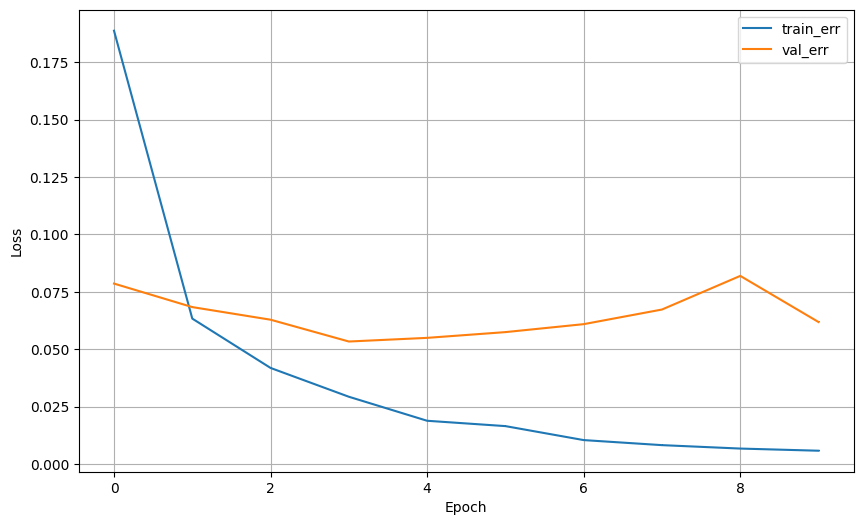

In [20]:
dl_history_plot(history)

* 예측 및 평가

In [21]:
pred = model.predict(x_val)

313/313 [==============================] - 1s 2ms/step


In [22]:
pred_1 = pred.argmax(axis=1)

In [23]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.9004
------------------------------------------------------------
[[970   0   0   1   0   0   2   0   7   0]
 [  0 766   6   4   0   0   0   0 358   1]
 [  1   0 999   3   0   0   2   1  26   0]
 [  0   0   4 985   0   1   0   0  20   0]
 [  2   0   8   0 854   0  11   1  62  44]
 [  3   0   0  18   0 749  10   0 108   4]
 [  6   0   1   0   1   1 929   0  20   0]
 [  2   0  20  29   0   0   0 839 104  34]
 [  1   0   2   1   0   0   0   0 970   0]
 [  3   0   0   7   0   0   0   0  56 943]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.67      0.81      1135
           2       0.96      0.97      0.96      1032
           3       0.94      0.98      0.96      1010
           4       1.00      0.87      0.93       982
           5       1.00      0.84      0.91       892
           6       0.97      0.97      0.97       958
       

### (2) 모델2
* 모델1에 이어서 다음을 조정해 봅시다.
    * Convnet의 커널 수를 32로 늘려 봅시다.

| Layer (type) | Output Shape  | Param #   |
|---- |----|----|
| conv2d (Conv2D)  |  (None, 28, 28, **32**) | 320       |
| max_pooling2d |  (None, 14, 14, 32) |      0         |
| flatten (Flatten) | (None, 3136)   |           0         |
| dense (Dense) |    (None, 128)   |            802944        |
| dense_1 (Dense) |    (None, 10)   |             1290     |

In [28]:
clear_session()

model = Sequential([ Conv2D(32, kernel_size=(3, 3), input_shape =(28,28,1), padding='same', strides = 1, activation= 'relu'),
                     MaxPooling2D(pool_size=(2, 2), strides=2),
                     Flatten(),
                     Dense(128, activation ='relu'),
                     Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 804554 (3.07 MB)
Trainable params: 804554 (3.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [29]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 10,
                    validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.1750 - val_loss: 0.0792
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0573 - val_loss: 0.0665
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0367 - val_loss: 0.0577
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0246 - val_loss: 0.0566
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0183 - val_loss: 0.0653
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0124 - val_loss: 0.0676
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0099 - val_loss: 0.0614
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0071 - val_loss: 0.0680
Epoch 9/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0057 - val_loss: 0.0793
Epoch 10/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.004

* 학습결과 그래프

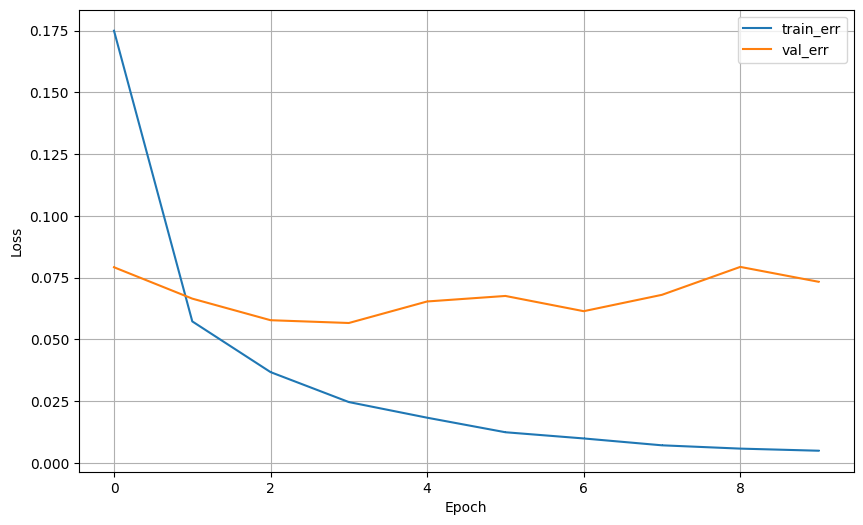

In [30]:
dl_history_plot(history)

* 예측 및 평가

In [31]:
pred = model.predict(x_val)

313/313 [==============================] - 1s 2ms/step


In [32]:
pred_1 = pred.argmax(axis=1)

In [33]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.9695
------------------------------------------------------------
[[ 975    0    0    0    0    0    2    1    2    0]
 [   0 1100    4    0    0    0    3    0   28    0]
 [   8    3  990    0    1    0    2    5   22    1]
 [   0    0    9  975    0    2    0    5   15    4]
 [   1    0    2    0  969    0    2    0    3    5]
 [   4    0    0   14    2  812   20    1   28   11]
 [   6    1    0    0    1    0  945    0    5    0]
 [   1    2   16    1    2    0    0  986   11    9]
 [   2    0    1    0    2    0    0    3  964    2]
 [   4    3    0    0   16    1    0    3    3  979]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.97      0.98      1135
           2       0.97      0.96      0.96      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.99      0.98       982
           5   

### (3) 모델3
* 모델2에 이어서, 아래 그림을 보고, 빠진 부분을 추가하시오.

![](https://github.com/DA4BAM/image/blob/main/cnn_mnist3.png?raw=true)

In [9]:
clear_session()

model = Sequential([ Conv2D(32, kernel_size= (3, 3), input_shape=(28,28,1), padding='same', activation = 'relu'),
                     MaxPooling2D(pool_size= (2, 2), strides=2),
                     Conv2D(64, kernel_size= (3, 3), padding='same', activation='relu' ),
                     MaxPooling2D(pool_size= (2, 2), strides=2),
                    Flatten(),
                    Dense(128, activation='relu' ),
                    Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 10,
                    validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 29s 9ms/step - loss: 0.1412 - val_loss: 0.0589
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0459 - val_loss: 0.0395
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0310 - val_loss: 0.0399
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0201 - val_loss: 0.0405
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0174 - val_loss: 0.0413
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0126 - val_loss: 0.0427
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0095 - val_loss: 0.0401
Epoch 8/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0081 - val_loss: 0.0532
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0072 - val_loss: 0.0464
Epoch 10/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.00

* 학습결과 그래프

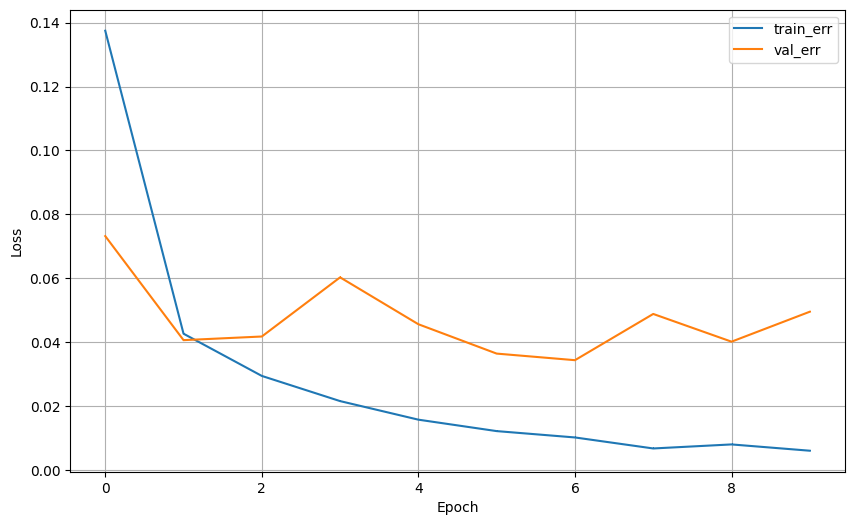

In [37]:
dl_history_plot(history)

* 예측 및 평가

In [38]:
pred = model.predict(x_val)

313/313 [==============================] - 1s 2ms/step


In [39]:
pred_1 = pred.argmax(axis=1)

In [40]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.9856
------------------------------------------------------------
[[ 973    0    2    0    0    0    3    1    1    0]
 [   0 1128    4    1    0    1    0    0    1    0]
 [   1    1 1029    0    0    0    1    0    0    0]
 [   0    0    4 1003    0    2    0    0    1    0]
 [   0    1    0    0  971    0    6    0    2    2]
 [   2    0    0    7    0  877    1    1    2    2]
 [   2    2    0    0    0    4  948    0    2    0]
 [   0    2   31    6    3    0    0  974    1   11]
 [   2    1    4    3    0    0    1    0  961    2]
 [   0    0    0    2    6    4    0    1    4  992]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      1.00      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5   

## 7.틀린그림 찾아보기
* 모델3의 결과에서 틀린 그림을 살펴 봅시다.
* 아래코드는 이해하기보다는 그냥 사용하기 바랍니다.

In [41]:
idx = (y_val != pred_1)
x_val_wr = x_val[idx]
y_val_wr = y_val[idx]
pred_wr = pred_1[idx]

x_val_wr = x_val_wr.reshape(-1,28,28)
print(x_val_wr.shape)

(144, 28, 28)


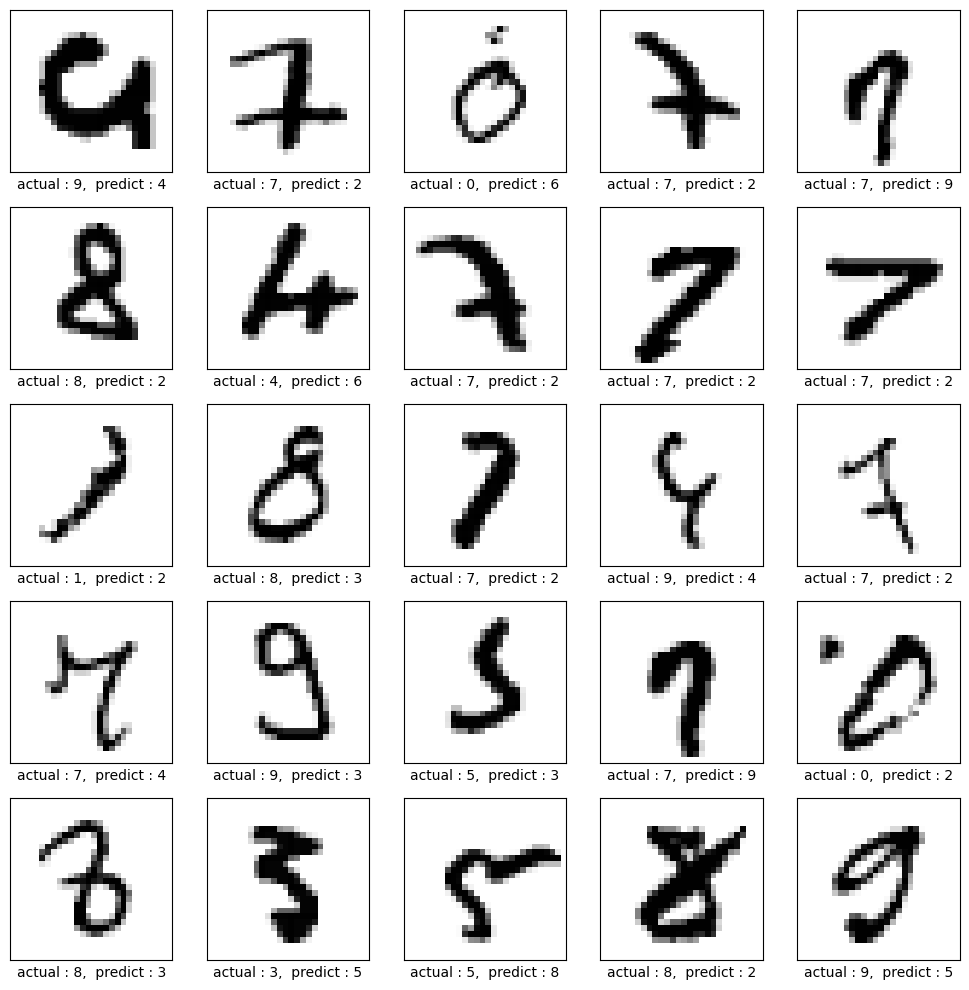

In [42]:
idx = rd.sample(range(x_val_wr.shape[0]),25)
x_temp = x_val_wr[idx]
y_temp = y_val_wr[idx]
p_temp = pred_wr[idx]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_temp[i], cmap=plt.cm.binary)
    plt.xlabel(f'actual : {y_temp[i]},  predict : {p_temp[i]}')
plt.tight_layout()
plt.show()

## 8.모델 저장하기

### (1) 모델 저장하기

In [11]:
model.save('mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### (2) 모델 로딩하기

In [12]:
from keras.models import load_model
model2 = load_model('mnist_model.h5')

* 불러온 모델 사용하기

In [82]:
pred = model2.predict(x_val)

313/313 [==============================] - 2s 7ms/step


In [83]:
pred_1 = pred.argmax(axis=1)

In [84]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.9856
------------------------------------------------------------
[[ 973    0    2    0    0    0    3    1    1    0]
 [   0 1128    4    1    0    1    0    0    1    0]
 [   1    1 1029    0    0    0    1    0    0    0]
 [   0    0    4 1003    0    2    0    0    1    0]
 [   0    1    0    0  971    0    6    0    2    2]
 [   2    0    0    7    0  877    1    1    2    2]
 [   2    2    0    0    0    4  948    0    2    0]
 [   0    2   31    6    3    0    0  974    1   11]
 [   2    1    4    3    0    0    1    0  961    2]
 [   0    0    0    2    6    4    0    1    4  992]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      1.00      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5   

## 9.진짜 손글씨로 예측해 봅시다.

* 이미지 처리를 위한 라이브러리와 함수 불러오기

In [13]:
import cv2
from google.colab.patches import cv2_imshow

* 그림판에서 그린 손글씨를 업로드 합니다.

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


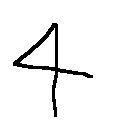

(140, 140)


In [15]:
# 파일 열기
img = cv2.imread('/content/drive/MyDrive/Deep_Learning_KT/lecture/4.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
print(img.shape)

* 이미지 크기를 28, 28, 1 로 맞추기

In [18]:
# 크기 조절하기
img = cv2.resize(255 - img, (28, 28))
print(img.shape)
cv2_imshow(img)

(28, 28)


* 예측하기

In [19]:
# 입력데이터 형식을 갖추기
test_num = img.reshape(1,28,28,1)

# 예측하기
pred = model.predict(test_num)
pred_1 = pred.argmax(axis=1)
print(pred_1)

1/1 [==============================] - 0s 39ms/step
[4]
